#Resultados TP2

##Mutacion
La idea para ver que mutacion conviene va a estar dividida en 2 partes. Primero un analisis unicamente de probabilidades de mutacion uniformes y luego con probabilidades no uniformes

Configuracion inicial:
{
  "clase": "DEFENSOR",
  "n": 100,
  "K": 20,
  "A": 0.5,
  "B": 0.5,
  "metodo1": "ruleta",
  "metodo2": "ruleta",
  "metodo3": "ruleta",
  "metodo4": "ruleta",
  "condicion_corte": {
    "tipo": "estructura",
    "MAX_FITNESS": 40,
    "GENERACIONES_IGUALES": 0.9,
    "GENERACIONES_SIN_CAMBIO": 3,
    "GENERACIONES_IGUAL_FITNESS": 6,
    "MAX_GENERACION": 10000
  },
  "seleccion": {
    "TORNEO_DETERMINISTICO_MUESTRA": 2,
    "TORNEO_PROBABILISTICO_THRESHOLD": 0.7
  },
  "cruce": {"probabilidadUniforme": 0.4},
  "probabilidad_mutacion" : 0.7,
  "rango": {
    "min": 0.2,
    "max": 2
  },
  "favorecer_jovenes": true,
  "metodo_cruce": "un_punto",
  "funcion_no_uniforme": null,
  "factor": 0.01,
  "T_C" : 10,
  "T_0" : 200 ,
  "T_K" : 0.03
}

Esta configuracion utiliza un unico metodo de seleccion que es la ruleta clasica, con una poblacion de 100 individuos, un K de 20, la clase DEFENSOR y vamos a dejarlo funcionar durante 100 generaciones.

La idea es ver para cada probabilidad de mutacion 4 datos: el promedio de fitness, el maximo fitness, el minimo fitness y la varianza de fitness para asi poder decidir que configuracion de mutacion nos conviene utilizar


In [1]:
import matplotlib.pyplot as plt

def graficar_barras_con_colores(datos, labels, xlabel, ylabel, title, varianzas, miny=None, maxy=None):
    # Verificar que los datos y las etiquetas tengan la misma longitud
    if len(datos) != len(labels):
        raise ValueError("La longitud de los datos y las etiquetas debe ser la misma.")

    # Crear la figura y el eje
    x = np.arange(len(labels))
    width = 0.5

    fig, ax = plt.subplots()
    if varianzas is None:
        ax.bar(x, datos, width)
    else:
        ax.bar(x, datos, width, yerr=varianzas, capsize=5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


    # Establecer las etiquetas de las barras
    ax.set_xticks(range(len(datos)))
    ax.set_xticklabels(labels)
    
    if miny is not None and maxy is not None:
        plt.ylim(miny, maxy)
    plt.title(title)

    # Mostrar la gráfica
    plt.show()

In [3]:
import json
import numpy as np
from TP2.main import *

gen
[75.35]


In [ ]:



#probabiliadd de mutacion en 0.7 y el resto arbitrario
#tenemos 8 mutaciones a analizar:
#   gen, multigen, completa, limitada. uniforme y no uniforme.

#Elegimos warrior y defensa aribitrario 

#El resultado -> ver que metodo de mutacion es el mejor. -> para ese metodo ver que % es el mejor.
resultados = []
varianzas = []
gen = []
metodos_mutacion = ["gen","multigen","completa","limitada"]
for metodo in metodos_mutacion:
    crear_configuracion_mutacion(0.5, metodo, 'decreciente')
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(np.mean(simulacion[:, 2]))
        gen.append(np.mean(simulacion[:, 0]))
        varianzas.append(np.var(simulacion[:,2]))


In [ ]:

graficar_barras_con_colores(resultados, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Fitnes promedio (100 interaciones)", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", varianzas)
print(resultados)

graficar_barras_con_colores(gen, ["Gen","Multigen","Completa","Limitada"], "Metodos de mutacion", "Fitnes promedio (100 interaciones)", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", varianzas)
print(gen)


#Estamos viendo que metodo de mutacion es el que mejor fitness promedio nos da. Se puede ver que 
# no depende tanto del metodo.

#CHECKEAR SI ESTA OK GRAFICAR SOLO EL PROMEDIO O TAMBIEN MAXIMOS MINIMOS 

In [ ]:
#Ver si es mejor tradicional o joven (FIJAMOS GEN)

resultados = []
fitnessPromedio = []
crear_configuracion_sesgo(True)
with open('custom_config.json', 'r') as file:
    custom_config = json.load(file)
    simulacion = np.array(simular_100_veces(custom_config))
    resultados.append(np.mean(simulacion[:, 0]))
    fitnessPromedio.append(np.mean(simulacion[:,2]))

crear_configuracion_sesgo(False)
with open('custom_config.json', 'r') as file:
    custom_config = json.load(file)
    simulacion = np.array(simular_100_veces(custom_config))
    resultados.append(np.mean(simulacion[:, 0]))
    fitnessPromedio.append(np.mean(simulacion[:,2]))
        
graficar_barras_con_colores(resultados, ["Joven", 'Tradicional'], "Metodos de mutacion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", None)

graficar_barras_con_colores(fitnessPromedio, ["Joven", 'Tradicional'], "Metodos de mutacion", "Fitness promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de mutación", None)
print(resultados)


#Viendo el grafico se puede ver que luego de 100 iteraciones se consige el mismo fitness promedio  pero en el caso del sesgo joven, se consigue en mayor cantidad de generaciones (tarda mas en converger y llega al mismo resultado -> mas lento)


In [3]:
import pandas as pd

#Tipos de seleccion
#Agarramos 
metodos_seleccion = ["elite", "universal", "ruleta", "determinista", "probabilistica", "boltzman", "ranking"]
#TODO: TENEMOS Q HACER GRAFICOS DE FITNESS ANTES PARA DESCARTAR RANKING Y DSPS DE LOS OTROS SE HACEN LOS DE GENERACIONES
resultados = []
varianza = []
for metodo1 in metodos_seleccion:
    resultados_metodo = []
    varianza_metodo = []
    for metodo2 in metodos_seleccion:
        crear_configuracion_seleccion(metodo1, metodo2)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados_metodo.append(np.mean(simulacion[:, 0]))
            varianza_metodo.append(np.var(simulacion[:, 0]))
            # print(simulacion[:, 0], np.var(simulacion[:, 0]))
    resultados.append(resultados_metodo) 
    varianza.append(varianza_metodo)
    
for i, res in enumerate(resultados):
    #para normalizar la varianza vamos a dividirla por la minima
    varianza_minima = min(varianza[i])
    titulo = "Promedio del generaciones del metodo " + metodos_seleccion[i] + " iterado 100 veces usando distintos metodos de selección"
    graficar_barras_con_colores(res, metodos_seleccion, "Metodos de seleccion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de seleccion", varianza[i]/varianza_minima, 0, 100)
    
df_resultados = pd.DataFrame(resultados, columns=metodos_seleccion, index=metodos_seleccion)

print(df_resultados)

#Nos esta dando una varianza gigantesca. 
#Conclusion: Depende mucho de la tirada pero suele ser elite con universal. CHECKEAR

gen
gen
gen
gen
gen
gen
gen
gen
gen


KeyboardInterrupt: 

gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen
gen


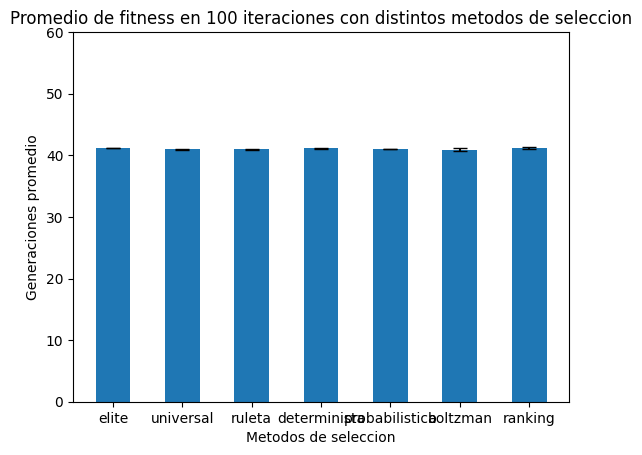

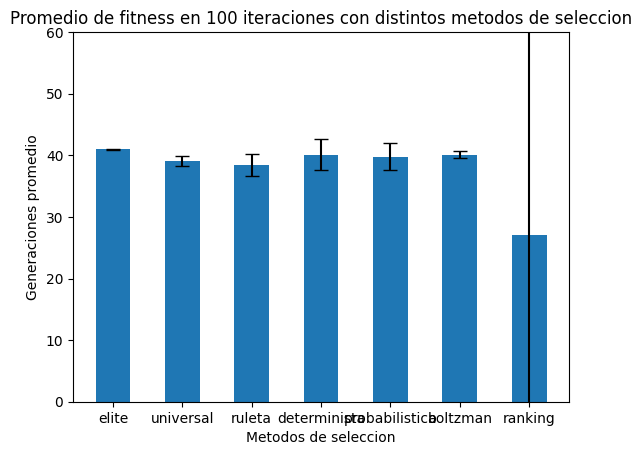

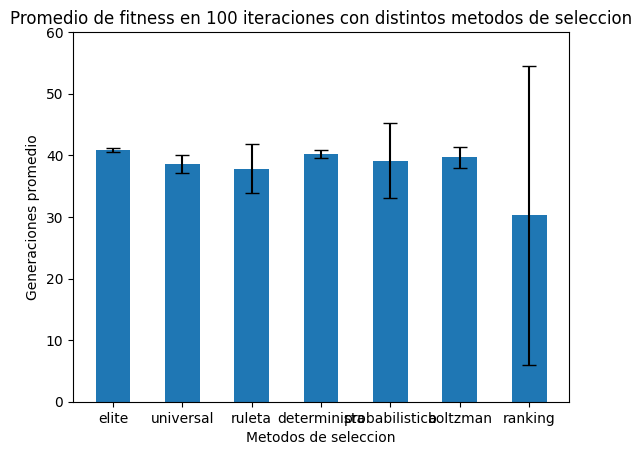

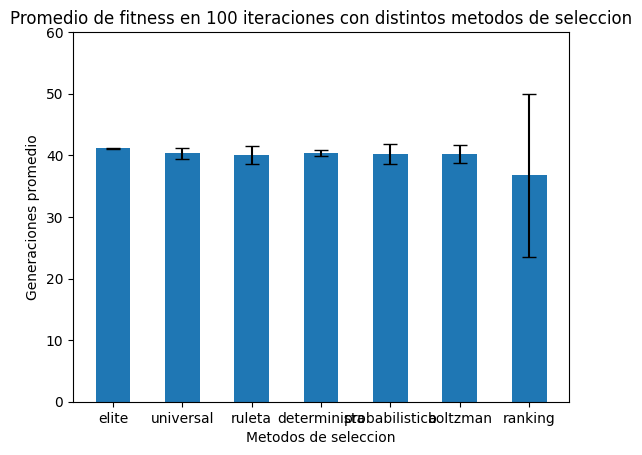

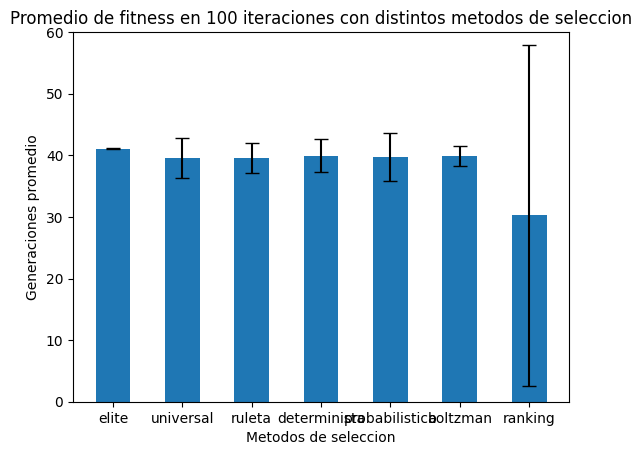

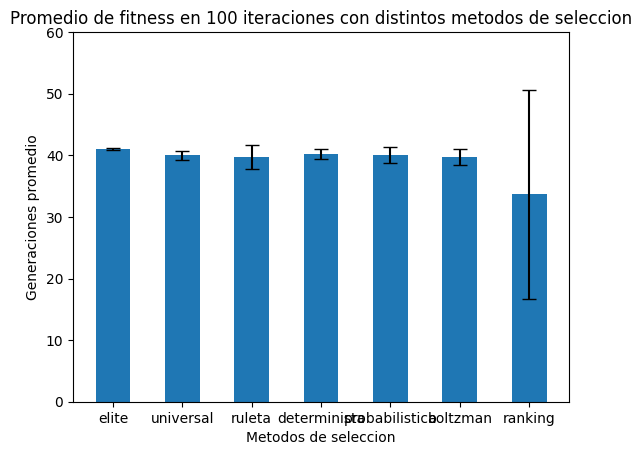

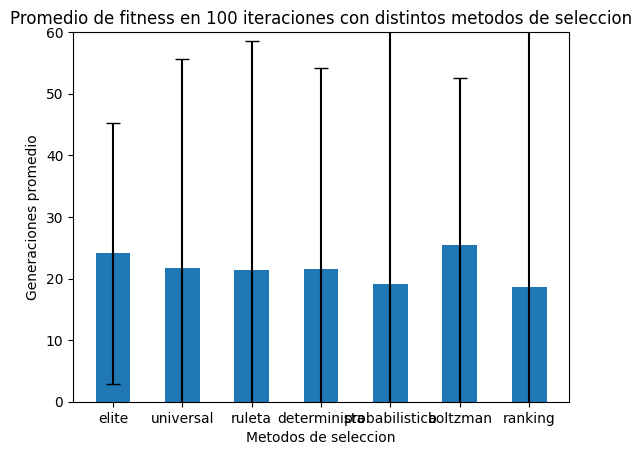

                    elite  universal     ruleta  determinista  probabilistica  \
elite           41.237602  40.979414  40.951100     41.149875       41.042117   
universal       40.973915  39.038179  38.444317     40.100968       39.781557   
ruleta          40.877747  38.597658  37.835283     40.168329       39.134026   
determinista    41.157128  40.359335  40.116845     40.407525       40.143682   
probabilistica  41.058278  39.554028  39.569941     39.965644       39.709309   
boltzman        41.001731  40.003875  39.698497     40.161437       40.093235   
ranking         24.119054  21.651523  21.446185     21.485403       19.133895   

                 boltzman    ranking  
elite           40.918570  41.143502  
universal       40.094986  27.012452  
ruleta          39.665515  30.268122  
determinista    40.148155  36.750583  
probabilistica  39.931630  30.268640  
boltzman        39.784233  33.666438  
ranking         25.458639  18.621835  


In [6]:
#Metodos de reemplazo
#Repetir similar al anterior pero eligiendo ya los metodos 1 y 2, misma secuencia pero para los 3 y 4. 
#Elegimos boltzmann y universal como metodos de seleccion
metodos_seleccion = ["elite", "universal", "ruleta", "determinista", "probabilistica", "boltzman", "ranking"]

resultados = []
varianza = []
for metodo3 in metodos_seleccion:
    resultados_metodo = []
    varianza_metodo = []
    for metodo4 in metodos_seleccion:
        crear_configuracion_reemplazo(metodo3, metodo4)
        with open('custom_config.json', 'r') as file:
            custom_config = json.load(file)
            simulacion = np.array(simular_100_veces(custom_config))
            resultados_metodo.append(np.mean(simulacion[:, 2]))
            varianza_metodo.append(np.var(simulacion[:, 2]))
            # print(simulacion[:, 0], np.var(simulacion[:, 0]))
    resultados.append(resultados_metodo)
    varianza.append(varianza_metodo)

for i, res in enumerate(resultados):
    titulo = "Promedio del generaciones del metodo " + metodos_seleccion[i] + " iterado 100 veces usando distintos metodos de selección"
    graficar_barras_con_colores(res, metodos_seleccion, "Metodos de seleccion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de seleccion", varianza[i],0,60)
    
df_resultados = pd.DataFrame(resultados, columns=metodos_seleccion, index=metodos_seleccion)

print(df_resultados)

In [ ]:
#elegimos de metodos de reemplazo (3 y 4) a elite y determinista

metodos_cruce = ["un_punto", "dos_puntos", "anular", "uniforme"]

resultados = []
generaciones = []
varianza = []
varianza_gen = []
for metodo in metodos_cruce:
    crear_configuracion_cruce(metodo)
    with open('custom_config.json', 'r') as file:
        custom_config = json.load(file)
        simulacion = np.array(simular_100_veces(custom_config))
        resultados.append(np.mean(simulacion[:, 2]))
        generaciones.append(np.mean(simulacion[:, 0]))
        varianza.append(np.var(simulacion[:, 2]))
        varianza_gen.append(np.var(simulacion[:, 0]))

graficar_barras_con_colores(resultados, metodos_cruce, "Metodos de seleccion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de seleccion", varianza,0,60)
print(resultados)

min_varianza_gen = min(varianza_gen)
graficar_barras_con_colores(generaciones, metodos_cruce, "Metodos de seleccion", "Generaciones promedio", "Promedio de fitness en 100 iteraciones con distintos metodos de seleccion", varianza_gen/min_varianza_gen,0,60)
print(generaciones)